# 1. Introduction

**Klasifikasi Diabetes**  

**Nama    :** Muhammad Damar Triwardana

**Dataset :** Diabetes Binary Health Indicators (BRFSS 2015)  

**Sumber  :** Behavioral Risk Factor Surveillance System (BRFSS) 2015

**Latar Belakang  :** Diabetes merupakan salah satu penyakit kronis yang terus meningkat jumlah penderitanya dan membawa dampak besar terhadap kualitas hidup serta beban biaya kesehatan. Karena itu, mengenali resiko diabetes sejak dini melalui indikator kesehatan dan pola hidup menjadi langkah penting untuk mendukung keputusan pencegahan.  

**Objektif    :** Tujuan dari project ini adalah membangun model klasifikasi untuk memprediksi apakah seseorang menderita diabetes untuk skrining kesehatan awal berdasarkan indikator kesehatan, dengan membandingkan algoritma machine learning menggunakan pipeline, cross validation dan juga hyperparameter tuning.

# 2. Import Libraries

In [1]:
# Manipulasi data
import pandas as pd
import numpy as np


# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler


# Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix


# Handling Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# Outlier Handling
from feature_engine.outliers import Winsorizer


# Model Saving
import pickle

# 3. Data Loading

In [2]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv') # Memanggil dataset untuk menjadi dataframe
df.head(10) # Menampilkan 10 data teratas

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [ ]:
df.shape # Menampilkan bentuk dari dataframe

(253680, 22)

Dari output tersebut dapat diketahui bahwa terdapat 253680 baris data, dan 22 kolom total.

In [ ]:
df.info() # Menampilkan informasi dari dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Dari output diatas dapat informasi bahwa tidak ada missing values dari total 253680 data, dan semua datanya bertipe float.

In [ ]:
df.duplicated().sum() # Menampilkan jumlah data duplikat

24206

Terdapat 24206 data duplikat, nah pengecekan ini dilakukan untuk memastikan kualitas dan keunikan datanya.

In [ ]:
df = df.drop_duplicates() # Menghapus data duplikat

Data duplikat yang sudah di cek tadi dihapus untuk menghindari adanya pengulangan informasi yang dapat memengaruhi proses machine learning. Keberadaan data yang sama berulang kali dapat buat model bias terhadap pola tertentu.

In [ ]:
df.duplicated().sum() # Menampilkan jumlah data duplikat, untuk mengecek

0

Mengecek kembali apakah data duplikatnya sudah benar benar terhapus pada datafrane atau belum. Jika melihat dari output tersebut, dapat dipastikan bahwa data duplikat sudah terhapus(drop).

In [3]:
nama_kolom = {
    'Diabetes_binary': 'Diabetes',
    'HighBP': 'High_BP',
    'HighChol': 'High_Chol',
    'CholCheck': 'Chol_Check',
    'BMI': 'BMI',
    'Smoker': 'Smoker',
    'Stroke': 'Stroke',
    'HeartDiseaseorAttack': 'Heart_Disease',
    'PhysActivity': 'Physical_Activity',
    'Fruits': 'Fruits',
    'Veggies': 'Veggies',
    'HvyAlcoholConsump': 'Alcoholic',
    'AnyHealthcare': 'Healthcare',
    'NoDocbcCost': 'No_Doctor_Because_Cost',
    'GenHlth': 'General_Health',
    'MentHlth': 'Mental_Health',
    'PhysHlth': 'Physical_Health',
    'DiffWalk': 'Difficulty_Walking',
    'Sex': 'Sex',
    'Age': 'Age',
    'Education': 'Education',
    'Income': 'Income'
}

df.rename(columns = nama_kolom, inplace=True) # Mengganti nama-nama kolom

Guna dari mengganti nama-nama kolom yang ada adalah untuk menyelaraskan nama-nama kolomnya dan untuk mempermudah nama-nama kolom itu untuk dibaca dan dimengerti.

In [4]:
df.columns # Menampilkan nama-nama kolom yang ada

Index(['Diabetes', 'High_BP', 'High_Chol', 'Chol_Check', 'BMI', 'Smoker',
       'Stroke', 'Heart_Disease', 'Physical_Activity', 'Fruits', 'Veggies',
       'Alcoholic', 'Healthcare', 'No_Doctor_Because_Cost', 'General_Health',
       'Mental_Health', 'Physical_Health', 'Difficulty_Walking', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [5]:
df

,Diabetes,High_BP,High_Chol,Chol_Check,BMI,Smoker,Stroke,Heart_Disease,Physical_Activity,Fruits,...,Healthcare,No_Doctor_Because_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
df.head(10).to_csv('Thedata.csv', index=False)

# 4. Exploratory Data Analysis (EDA)

## 4.1. Bagaimana distribusi target diabetes?

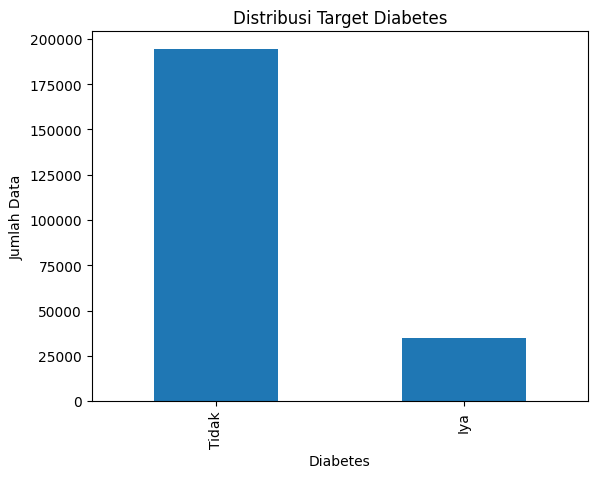

In [36]:
# Membuat plot untuk melihat distribusi kolom target (diabetes)
ax = df['Diabetes'].value_counts().plot(kind='bar')

ax.set_xticklabels(['Tidak', 'Iya'])
plt.title('Distribusi Target Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Jumlah Data')

plt.show()

Berdasarkan plot diatas dapat diketahui bahwa jumlah data dengan label tidak diabetes sangat jauh lebih besar dibandingkan dengan yang diabetes. Hal ini menunjuukkan bahwa dataset memiliki ketidakseimbangan kelas (class imbalance), yang di mana mayoritas observasi berasal dari kelas tidak diabetes. Kondisi ini berpotensi menyebabkan model bias terhadap kelas mayoritas, sehingga menurut saya akurasi saja tidak cukup untuk mengevaluasi performa model. Maka dari itu, pada tahap pemodelan nanti saya akan menggunakan metrik recall, yang lebih menekankan kemampuan model dalam mendeteksi individu yang benar-benar beresiko diabetes. Cara ini lebih lebih relevan dalam konteks kesehatan, karena kesalah gagal mendeteksi penderita (false negative) dapat memiliki dampak yang cukup serius.

## 4.2. Apakah Datasetnya mengalami imbalance?

In [ ]:
# Mengecek keseimbangan data
df['Diabetes'].value_counts(normalize = True)

Diabetes
0.0    0.847055
1.0    0.152945
Name: proportion, dtype: float64

Dari output diatas dapat diketahui sebanyak 85% orang tidak menderita diabetes dan sisanya (15%) menderita diabetes. Jadi dapat dipastikan bahwa data ini termasuk kelas tidak seimbang (class imbalance).

## 4.3. Bagaimana distribusi BMI (Body Mass Index) pada penderita dan non penderita diabetes?

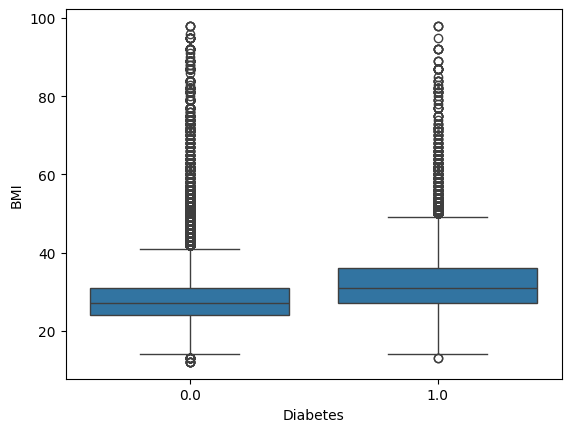

In [ ]:
# Membuat boxplot untuk melihat distribusi BMI (Body Mass Index)
sns.boxplot(x = 'Diabetes', y = 'BMI', data = df)
plt.show()

Boxplot diatas menunjukkan bahwa kelompok dengan diabetes (1) memiliki median Body Mass Index (BMI) yang jauh lebih tinggi dibandingkan dengan kelompok tidak diabetes (0). Selain itu pula, IQR BMI pada penderita diabetes lebih cenderung berada pada nilai yang tinggi, ini mengindikasikan hubungan antara peningkatan BMI dan resiko diabetes. Meskipun outlier pada kedua kelompok BMI cukup ekstrem, sebaran BMI tinggi ini lebih dominan pada kelas diabetes. Hal ini berarti menjukkan bahwa BMI adalah salah satu fitur yang relevan dan berpotensi berkontribusi dalam proses klasifikasi diabetes.  
Kategori umum BMI:
- <18.5 = Kurus
- 18.5 - 24.9 = Normal
- 25 – 29.9 = Overweight 
- ≥ 30 = Obesitas       


## 4.4. Apakah usia berpengaruh terhadap diabetes?

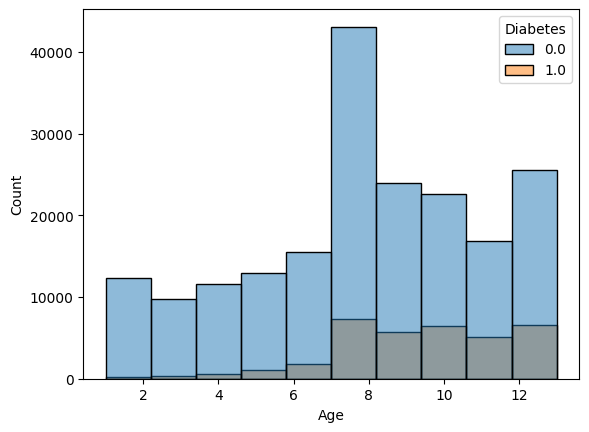

In [40]:
sns.histplot(data = df, x = 'Age', hue = 'Diabetes', bins = 10)
plt.show()

Dari plot histogram diatas menunjukkan bahwa jumlah individu dengan diabetes cenderung meningkat pada kelompok usia yang lebih tinggi. Pada usia muda, kasus diabetes relative lebih sedikit dibandingkan dengan kelompok usia menengah. Walaupun jumlah individu tidak diabetes masih banyak pada seluruh kategori usia, proporsi dari penderita diabetes terlihat lebih besar pada usia yang lebih tua. Pola ini menunjukkan bahwa adanya hubungan antara peningkatan usia dan resiko diabetes, sehingga variable usia berpotensi menjadi fitur yang relevan dalam proses kalasifikasi.

BRFSS, umur tidak disimpan sebagai ANGKA TAHUN, melainkan sebagai kategori, berikut adalah list nya:
-  AGE 1  = Usia 18–24         
-  AGE 2  = Usia 25–29         
-  AGE 3  = Usia 30–34         
-  AGE 4  = Usia 35–39         
-  AGE 5  = Usia 40–44        
-  AGE 6  = Usia 45–49         
-  AGE 7  = Usia 50–54        
-  AGE 8  = Usia 55–59         
-  AGE 9  = Usia 60–64         
-  AGE 10 = Usia 65–69         
-  AGE 11 = Usia 70–74         
-  AGE 12 = Usia 75–79         
-  AGE 13 = Usia ≥80           


## 4.5. Hubungan tekanan darah tinggi dengan diabetes

C:\Users\damar\AppData\Local\Temp\ipykernel_24672\3760356054.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Tekanan Darah Normal', 'Tekanan Darah Tinggi'])


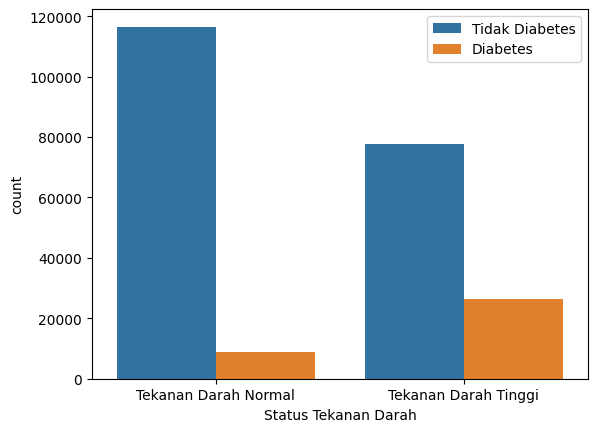

In [35]:
# Membuat countplot
ax = sns.countplot(x = 'High_BP', hue = 'Diabetes', data = df)

# Ganti label sumbu X
ax.set_xticklabels(['Tekanan Darah Normal', 'Tekanan Darah Tinggi'])
ax.set_xlabel('Status Tekanan Darah')

# Ambil legend handle & label
handles, labels = ax.get_legend_handles_labels()

# Set legend
ax.legend(handles, ['Tidak Diabetes', 'Diabetes'])

plt.show()

Visualisasi menunjukkan bahwa jumlah individu dengan diabetes lebih banyak ditemukan pada kelompok dengan tekanan darah tinggi dibandingkan kelompok dengan tekanan darah normal. Meskipun jumlah individu tanpa diabetes masih mendominasi pada kedua kelompok, proporsi penderita diabetes terlihat lebih besar pada individu dengan tekanan darah tinggi. Pada kelompok dengan tekanan darah normal, kasus diabetes relatif lebih sedikit dan didominasi oleh individu tanpa diabetes. Sebaliknya, pada kelompok tekanan darah tinggi, jumlah penderita diabetes meningkat secara signifikan. Pola ini mengindikasikan adanya hubungan antara tekanan darah tinggi dan peningkatan resiko diabetes. Hasil ini menunjukkan bahwa status tekanan darah merupakan salah satu faktor yang berpotensi berkontribusi dalam memprediksi diabetes dan layak dipertimbangkan sebagai fitur penting dalam proses pemodelan.

## 4.6. Hubungan antar fitur numerik

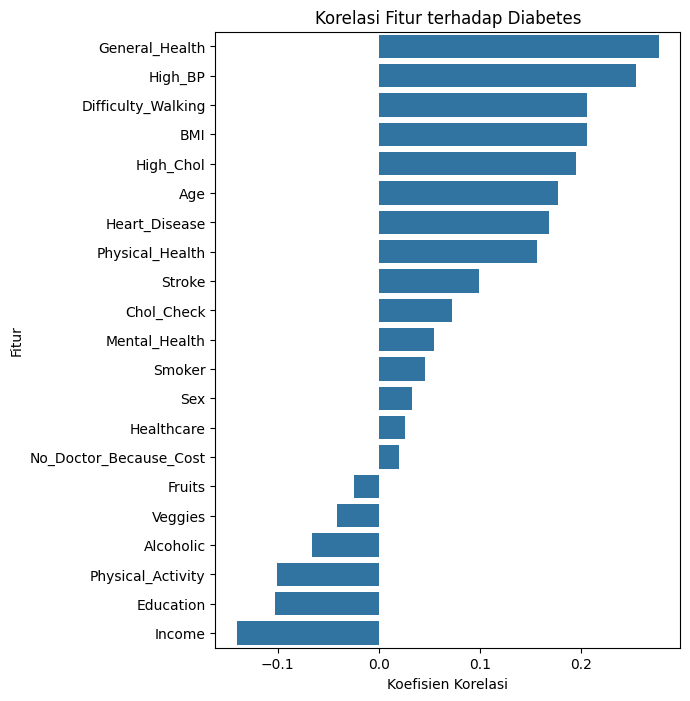

In [43]:
corr_target = df.corr()['Diabetes'].drop('Diabetes').sort_values(ascending=False)

plt.figure(figsize=(6,8))
sns.barplot(x=corr_target.values, y=corr_target.index)
plt.title('Korelasi Fitur terhadap Diabetes')
plt.xlabel('Koefisien Korelasi')
plt.ylabel('Fitur')
plt.show()

Hasil analisis korelasi diatas menunjukkan bahwa beberapa fitur memeliki hubungan positif terhadap status diabetes. Fitur dengan korelasi positif tertinggi adalah kondisi Kesehatan umum, tekanan darh tinggi, kesulitan berjalan, BMI dan kadar kolestreol tinggi. Hal ini menunjukkan bahwa individuu dengan kondisi Kesehatan yang lebih buruk, tekanan darah tinggi, keterbatasan mobilitas, serta BMI dan kolesterol yang lebih tinggi cenderung punya resiko diabetes ynag lebih besar. Tapi, ada juga beberapa fitur yang menunjukkan korelasi negatif terhadap diabetes, seperti tingkat pendapatan, tingkat, Pendidikan dan aktivitas fisik.

## 4.7. Skewness check

In [47]:
df.skew().sort_values(ascending = False)

Stroke                    4.400098
Alcoholic                 3.676228
No_Doctor_Because_Cost    2.804345
Heart_Disease             2.606237
Mental_Health             2.544532
BMI                       2.063475
Physical_Health           2.044139
Diabetes                  1.928442
Difficulty_Walking        1.616080
General_Health            0.351222
Sex                       0.245483
High_Chol                 0.235046
High_BP                   0.183394
Smoker                    0.137122
Age                      -0.384383
Fruits                   -0.462602
Education                -0.690306
Income                   -0.780377
Physical_Activity        -1.053611
Veggies                  -1.458348
Healthcare               -3.947109
Chol_Check               -4.660734
dtype: float64

Hasil analisis skewness menunjukkan bahwa sebagian besar fitur dalam dataset memiliki distribusi yang tidak simetris. Beberapa fitur seperti Stroke, Alcoholic, No_Doctor_Because_Cost, Heart_Disease, dan Mental_Health memiliki skewness positif yang cukup tinggi, yang mengindikasikan skew panjang ke kanan. Hal ini berarti bahwa kejadian pada fitur-fitur tersebut relatif jarang, dengan sebagian besar observasi bernilai rendah. Fitur BMI dan Physical_Health juga menunjukkan skewness positif sedang, yang mengindikasikan adanya sebaran nilai tinggi pada sebagian kecil data. Di sisi lain, beberapa fitur memiliki skewness negatif, seperti Physical_Activity, Veggies, Healthcare, dan Chol_Check, yang menunjukkan dominasi nilai tinggi dengan ekor distribusi ke kiri.

Secara keseluruhan, hasil ini menunjukkan bahwa distribusi fitur tidak sepenuhnya mengikuti distribusi normal. Oleh karena itu, pemilihan model yang tidak sensitif terhadap distribusi data atau penerapan teknik scaling dan transformasi yang sesuai perlu dipertimbangkan pada tahap pemodelan.

# 5. Feature Engineering

## 5.1. Splitting X & y and Splitting Test and Train set

In [ ]:
# Split X & y
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']

# Split Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23, stratify = y)

Pada tahap ini, dataset dipisahkan menjadi fitur (X) dan target (y), di mana kolom Diabetes dijadikan sebagai variabel target yang ingin diprediksi. Selanjutnya, data dibagi menjadi data latih dan data uji dengan rasio 80:20. Penggunaan parameter stratify=y bertujuan untuk memastikan proporsi kelas diabetes dan non-diabetes pada data latih dan data uji tetap seimbang dan merepresentasikan distribusi data asli. Hal ini penting karena dataset memiliki kondisi class imbalance, sehingga pembagian data yang tidak stratified berpotensi menyebabkan bias pada proses evaluasi model. Dengan adanya random_state=23, proses pembagian data menjadi reproducible, sehingga hasil eksperimen dapat diulang dan dibandingkan secara konsisten.

## 5.2. Outlier Handling

In [25]:
num_cols = X.columns.tolist()

num_pipeline = Pipeline([
('winsor', Winsorizer(capping_method='gaussian', tail='both', fold=1.5)),
('scaler', RobustScaler())
])


preprocessor = ColumnTransformer([
('num', num_pipeline, num_cols)
])

Hasil analisis skewness sebelumnya menunjukkan bahwa sebagian besar fitur memiliki distribusi yang tidak simetris, baik dengan skewness positif maupun negatif. Kondisi ini mengindikasikan adanya outlier atau ketimpangan distribusi, terutama pada fitur-fitur kesehatan yang kejadiannya relatif jarang, seperti Stroke, Alcoholic, dan Heart Disease. Maka dari itu untuk menangani hal tersebut, pada tahap feature engineering diterapkan Winsorization dengan metode Gaussian capping. Teknik ini bertujuan untuk membatasi pengaruh nilai ekstrem tanpa menghapus data, sehingga pola utama tetap terjaga dan model menjadi lebih stabil terhadap outlier.

# 6. Model Definition

Beberapa algoritma klasifikasi digunakan dan dibandingkan untuk menentukan model yang paling sesuai dalam mendeteksi resiko diabetes. Pemilihan model dilakukan dengan mempertimbangkan karakteristik data serta tujuan utama analisis, yaitu mendeteksi sebanyak mungkin individu yang beresiko.

- K-Nearest Neigbors: KNN digunakan sebagai model sederhana berbasis jarak antar data dan berfungsi sebagai baseline untuk melihat performa awal klasifikasi. 
- Support Vector Machine: SVM dipilih karena kemampuannya dalam menangani permasalahan klasifikasi non-linear dengan memanfaatkan hyperplane optimal. 
- Decision Tree Classifier: Decision Tree digunakan karena sifatnya yang mudah diinterpretasikan dan mampu menangkap hubungan non-linear antar fitur, sehingga relevan untuk analisis pada domain kesehatan. 
- Random Forest Classifier: Random Forest, sebagai pengembangan dari Decision Tree berbasis ensemble, digunakan untuk mengurangi overfitting dan meningkatkan stabilitas prediksi.
- Gradient Boosting: Gradient Boosting diterapkan karena kemampuannya dalam membangun model secara bertahap dengan fokus pada perbaikan kesalahan prediksi sebelumnya, yang sering kali menghasilkan performa yang lebih baik pada permasalahan kompleks.

Metrik evaluasi utama yang digunakan adalah Recall.  
Pemilihan recall didasarkan pada kondisi dataset yang bersifat imbalanced serta konteks permasalahan kesehatan, di mana kesalahan dalam mengklasifikasikan individu yang sebenarnya beresiko diabetes sebagai tidak beresiko (false negative) memiliki dampak yang lebih serius. Oleh karena itu, model difokuskan untuk memaksimalkan kemampuan dalam mendeteksi kelas positif.


# 7. Model Training

In [26]:
models = {
'KNN': KNeighborsClassifier(),
'SVM': SVC(),
'DecisionTree': DecisionTreeClassifier(random_state=23),
'RandomForest': RandomForestClassifier(random_state=23),
'Boosting': GradientBoostingClassifier(random_state=23)
}


cv_results = {}


for name, model in models.items():
    pipe = ImbPipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=3, scoring='recall', n_jobs = -1)
    cv_results[name] = (scores.mean(), scores.std())


cv_results

{'KNN': (0.21732313366569164, 0.0032277509630376676),
 'SVM': (0.05627188159910673, 0.002303738661387017),
 'DecisionTree': (0.3205714619046706, 0.004010791902019843),
 'RandomForest': (0.1660018473313163, 0.0017472805216310445),
 'Boosting': (0.16461271110672757, 0.003039136489784062)}

Berdasarkan hasil cross validation menggunakan metrik recall, model Decision Tree menghasilkan nilai recall rata-rata tertinggi dibandingkan model lainnya. Hal ini menunjukkan bahwa Decision Tree memiliki kemampuan terbaik dalam mendeteksi individu yang beresiko diabetes. Model seperti SVM dan KNN menunjukkan performa recall yang rendah, yang mengindikasikan bahwa model tersebut kurang efektif dalam menangkap pola minoritas pada dataset ini. Oleh karena itu, Decision Tree dipilih sebagai model terbaik untuk dilakukan hyperparameter tuning pada tahap selanjutnya.

# 8. Model Evaluation

In [27]:
param_grid = {
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 5, 10],
    'model__criterion': ['gini', 'entropy']
}


dt_pipe = ImbPipeline([
('preprocess', preprocessor),
('smote', SMOTE(random_state=23)),
('model', DecisionTreeClassifier(random_state=23))
])


grid = GridSearchCV(dt_pipe, param_grid = param_grid, cv=3, scoring='recall')
grid.fit(X_train, y_train)

c:\Users\damar\miniconda3\envs\h8_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\damar\miniconda3\envs\h8_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\damar\miniconda3\envs\h8_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\damar\miniconda3\envs\h8_env\lib\s

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('winsor',
                                                                                          Winsorizer(fold=1.5,
                                                                                                     tail='both')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['High_BP',
                                                                          'High_Chol',
                                                                          'Chol_Check',
                                                                          'BMI',
                                                                          'Smoker',
                                                                          'Stroke',
                                                                          'Heart_Disease',
                                                                          'Physical_Activity',
                                                                          'Fruits',
                                                                          'Veggies',
                                                                          'Alcoholic',
                                                                          'Healthcare',
                                                                          'No_Doctor_Because_Cost',...
                                                                          'Mental_Health',
                                                                          'Physical_Health',
                                                                          'Difficulty_Walking',
                                                                          'Sex',
                                                                          'Age',
                                                                          'Education',
                                                                          'Income'])])),
                                       ('smote', SMOTE(random_state=23)),
                                       ('model',
                                        DecisionTreeClassifier(random_state=23))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [None, 5, 10, 20],
                         'model__min_samples_leaf': [1, 5, 10],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='recall')

Hasil hyperparameter tuning menunjukkan bahwa konfigurasi parameter tertentu mampu meningkatkan kemampuan model dalam mendeteksi kelas positif. Proses tuning ini membantu menyeimbangkan kompleksitas Decision Tree sehingga model tidak terlalu sederhana (underfitting) maupun terlalu kompleks (overfitting). Maka dari itu, model hasil tuning ini diharapkan memiliki performa yang lebih optimal dibandingkan baseline Decision Tree.

              precision    recall  f1-score   support

         0.0       0.94      0.66      0.78     38876
         1.0       0.29      0.76      0.42      7019

    accuracy                           0.68     45895
   macro avg       0.61      0.71      0.60     45895
weighted avg       0.84      0.68      0.72     45895



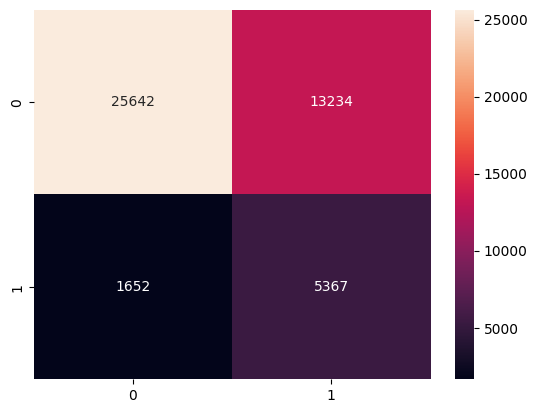

In [28]:
grid.best_params_

y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

Hasil evaluasi model menunjukkan bahwa model Decision Tree memiliki recall yang cukup tinggi pada kelas diabetes (0.76), yang berarti sebagian besar individu yang benar-benar menderita diabetes berhasil terdeteksi oleh model. Hal ini sangat penting dalam konteks skrining kesehatan, karena tujuan utama adalah meminimalkan kasus penderita yang tidak terdeteksi. Tapi, nilai precision pada kelas diabetes masih terbilang rendah (0.29), yang mengindikasikan adanya cukup banyak false positive. Artinya, model cenderung lebih “waspada” dengan mengklasifikasikan individu sebagai beresiko diabetes meskipun sebagian di antaranya sebenarnya tidak. Maka dari itu, masih dapat diterima dalam konteks kesehatan, karena false positive lebih dapat ditoleransi dibandingkan false negative, terutama untuk keperluan skrining awal.


Lalu, hasil Confusion Matrix memperlihatkan bahwa model mampu mengidentifikasi sebagian besar individu dengan diabetes, meskipun masih terdapat sejumlah kesalahan klasifikasi pada kelas negatif. Pola ini konsisten dengan tujuan pemodelan yang memprioritaskan recall, yaitu mendeteksi sebanyak mungkin individu beresiko diabetes. Hasil ini menunjukkan bahwa model lebih cocok digunakan sebagai alat skrining awal, bukan sebagai alat diagnosis yang paten.


# 9. Model Saving

In [29]:
with open ('best_diabetes_model.pkl', 'wb') as f:
  pickle.dump(grid.best_estimator_, f)

# 10. Model Inference

Model inference ada pada file 'P1M2_muhammad_damar_inf.ipynb'. Jadi untuk melihat data baru yang menggunakan model terbaik bisa dilihat pada file tersebut.

# 11. Conclusion

Berdasarkan seluruh tahapan yang telah dilakukan, mulai dari eksplorasi data, feature engineering, hingga pemodelan dan evaluasi, dapat disimpulkan bahwa dataset yang digunakan memiliki kondisi class imbalance serta distribusi fitur yang tidak sepenuhnya simetris. Kondisi ini mendorong penggunaan preprocessing berupa winsorization untuk mengurangi pengaruh outlier dan robust scaling agar model lebih stabil terhadap distribusi data yang tidak normal. Selain itu, metrik recall dipilih sebagai fokus utama evaluasi karena lebih relevan dengan tujuan deteksi resiko diabetes. Lalu dari beberapa algoritma yang diuji menggunakan cross validation, Decision Tree menunjukkan performa terbaik dalam mendeteksi individu yang beresiko diabetes dibandingkan model lainnya. Oleh karena itu, model ini dipilih untuk dilakukan proses hyperparameter tuning. Hasil tuning menunjukkan adanya peningkatan performa, khususnya dalam kemampuan model mendeteksi kelas positif (diabetes).

Hasil evaluasi akhir memperlihatkan bahwa model memiliki nilai recall yang cukup tinggi pada kelas diabetes, sehingga model ini layak digunakan sebagai alat skrining awal. Meskipun nilai precision pada kelas positif masih relatif rendah, kondisi ini masih dapat diterima dalam konteks kesehatan, karena kesalahan dalam mendeteksi individu beresiko (false negative) memiliki dampak yang lebih serius dibandingkan kesalahan prediksi positif palsu (false positive).

Pada tahap inference, model berhasil diaplikasikan pada data individu baru dan menghasilkan prediksi bahwa individu tersebut memiliki resiko diabetes dengan probabilitas sebesar 0.54. Hasil ini menunjukkan bahwa model dapat digunakan untuk membantu meningkatkan kesadaran serta mendukung upaya deteksi dini resiko diabetes pada masyarakat. Secara keseluruhan, model yang dibangun telah memenuhi tujuan proyek yang ditetapkan dan dapat dijadikan sebagai dasar untuk pengembangan lebih lanjut, seperti penyesuaian threshold prediksi atau eksplorasi model ensemble yang lebih kompleks guna meningkatkan performa prediksi.